In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

f:\anaconda\envs\handwritten\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 91ms/step - accuracy: 0.8606 - loss: 0.4571 - val_accuracy: 0.9764 - val_loss: 0.0766
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 89ms/step - accuracy: 0.9800 - loss: 0.0635 - val_accuracy: 0.9826 - val_loss: 0.0589
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 94ms/step - accuracy: 0.9852 - loss: 0.0446 - val_accuracy: 0.9846 - val_loss: 0.0514
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 92ms/step - accuracy: 0.9897 - loss: 0.0314 - val_accuracy: 0.9883 - val_loss: 0.0397
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.9924 - loss: 0.0241 - val_accuracy: 0.9888 - val_loss: 0.0420


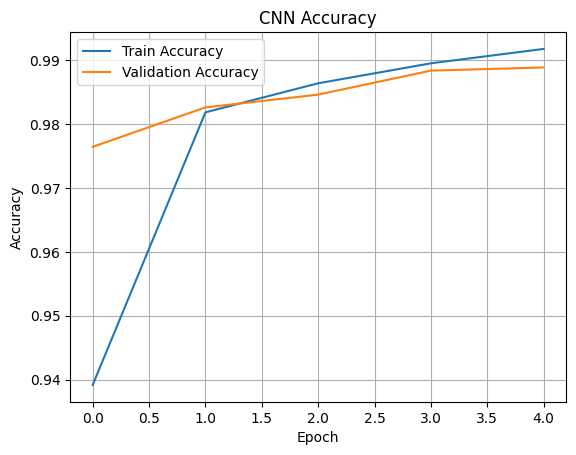

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9858 - loss: 0.0419
Test Accuracy: 0.9886999726295471


In [9]:
model.save("cnn_digit_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


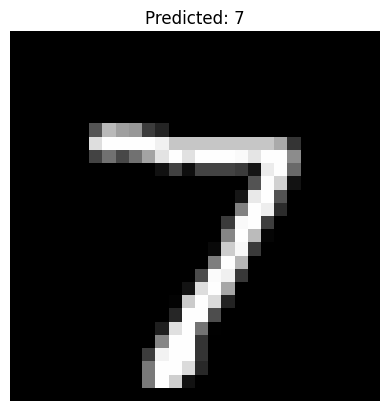

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


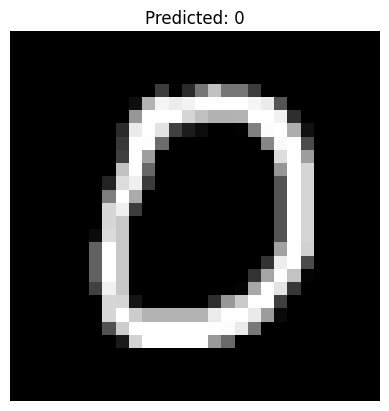

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


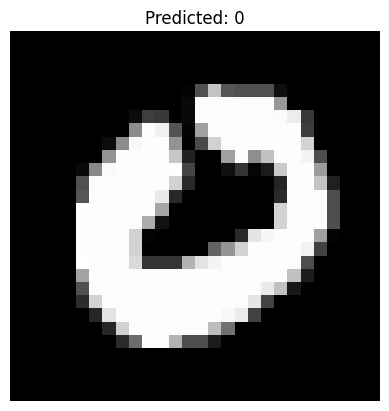

In [10]:
def predict_sample(index):
    img = x_test[index]
    pred = model.predict(img.reshape(1, 28, 28, 1))
    label = np.argmax(pred)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()

predict_sample(0)
predict_sample(10)
predict_sample(25)